# ADD 2022 Challenge data
**EDA** : data-confirm

* **genuine** vs **fake**  

In [1]:
import datetime

import tensorflow as tf
import numpy as np
import os
import tensorflow.keras
from tensorflow.keras import backend as K
from scipy.io import wavfile
import numpy as np
import librosa
import soundfile as sf
from tensorflow.keras.utils import to_categorical
import msgpack
import msgpack_numpy as m
import os
from tensorflow.keras.layers import Conv2D, maximum, add, SeparableConv2D
from sklearn.metrics import roc_curve

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
save_path = '/Data/syh19/FFM_sy/'

In [6]:
def feature_extract_cqt(fnm, samp_sec=3, sr = 16000, pre_emphasis = 0, filter_scale = 1, n_bins = 100, fmin = 10) :
            

    data, sample_rate = sf.read(fnm, dtype = 'int16')

    data = data * 1.0

    if samp_sec:
        if len(data) > sample_rate * samp_sec : 
            n_samp = len(data) // int(sample_rate * samp_sec)
            signal = []
            for i in range(n_samp) :
                signal.append(data[ int(sample_rate * samp_sec)*i:(int(sample_rate * samp_sec)*(i+1))]) 
        else :
            n_samp = 1
            signal = np.zeros(int(sample_rate*samp_sec,))
            for i in range(int(sample_rate * samp_sec) // len(data)) :
                signal[(i)*len(data):(i+1)*len(data)] = data
            num_last = int(sample_rate * samp_sec) - len(data)*(i+1)
            signal[(i+1)*len(data):int(sample_rate * samp_sec)] = data[:num_last]
            signal = [signal]    
    else:
        n_samp = 1
        signal = [data]   
        
    Sig = []
    for i in range(n_samp) :
        if pre_emphasis :
            emphasized_signal = np.append(signal[i][0], signal[i][1:] - pre_emphasis * signal[i][:-1])
        else :
            emphasized_signal = signal[i] 
            
        Sig.append(np.log(np.abs(librosa.cqt(emphasized_signal, sr=sample_rate,
                                             filter_scale = filter_scale, n_bins=n_bins,
                                             fmin = fmin))+1))
    return Sig

In [8]:
sr = 16000
sec = 9.0
batch_size = 16
feature = "cqt"
filter_scale = 1
n_bins = 100
fmin = 5
pre_emphasis = 0

bins_per_octave = 12
hop_length = 128

## genuine audio

In [60]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00000000.wav'

wav = wave.open(wav_fname)
print("* [genuine audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [genuine audio]
* Sampling rate:  16000 Hz
* Total samples:  64958 samples
* Duration: 4.059875 sec
* Channels : 1 channels


### save a sample data

In [74]:
import shutil

# 원본 WAV 파일 경로
add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
original_wav_fname = add2022 + 'ADD_T_00000000.wav'

# 새로운 저장 경로
save_path = '/Data/syh19/FFM_sy/sample_data/'
new_wav_fname = save_path + 'ADD_T_00000000.wav'

# 원본 WAV 파일을 새 경로로 복사
shutil.copy2(original_wav_fname, new_wav_fname)

print(f"WAV 파일을 새 경로에 저장 완료: {new_wav_fname}")


WAV 파일을 새 경로에 저장 완료: /Data/syh19/FFM_sy/sample_data/ADD_T_00000000.wav


cqt


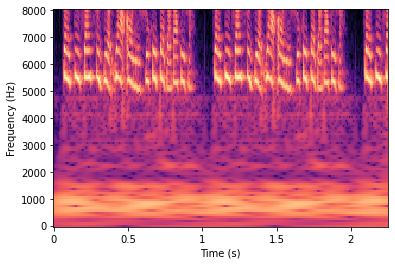

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

Sig = feature_extract_cqt(wav_fname, samp_sec=sec, sr = sr,
                          pre_emphasis = pre_emphasis,
                          filter_scale = filter_scale, n_bins = n_bins, fmin = fmin)[0]
print("cqt")

fig, ax = plt.subplots()
img = librosa.display.specshow(Sig, y_axis = "linear", sr = sr, hop_length =128, x_axis='time', 
                               ax=ax,  bins_per_octave=bins_per_octave,
                               auto_aspect=False
)


# fig.colorbar(img, ax=ax, format="%+2.f dB")



plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.title("No augmentation")
plt.savefig(save_path + "Normal_environment.png", dpi=300);
# plt.colorbar(format="%+2.0f dB");


In [62]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00000001.wav'

wav = wave.open(wav_fname)
print("* [genuine audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [genuine audio]
* Sampling rate:  16000 Hz
* Total samples:  50720 samples
* Duration: 3.17 sec
* Channels : 1 channels


In [63]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00000002.wav'

wav = wave.open(wav_fname)
print("* [genuine audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [genuine audio]
* Sampling rate:  16000 Hz
* Total samples:  50239 samples
* Duration: 3.1399375 sec
* Channels : 1 channels


cqt


Text(0, 0.5, 'Frequency (Hz)')

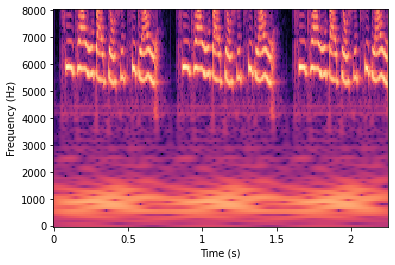

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

Sig = feature_extract_cqt(wav_fname, samp_sec=sec, sr = sr,
                          pre_emphasis = pre_emphasis,
                          filter_scale = filter_scale, n_bins = n_bins, fmin = fmin)[0]
print("cqt")

fig, ax = plt.subplots()
img = librosa.display.specshow(Sig, y_axis = "linear", sr = sr, hop_length =128, x_axis='time', 
                               ax=ax,  bins_per_octave=bins_per_octave,
                               auto_aspect=False
)


# fig.colorbar(img, ax=ax, format="%+2.f dB")



plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.title("No augmentation")
# plt.savefig(save_path + "DataAug_NoAug.png", dpi=300);
# plt.colorbar(format="%+2.0f dB");


In [65]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00000192.wav'

wav = wave.open(wav_fname)
print("* [genuine audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [genuine audio]
* Sampling rate:  16000 Hz
* Total samples:  54558 samples
* Duration: 3.409875 sec
* Channels : 1 channels


cqt


Text(0, 0.5, 'Frequency (Hz)')

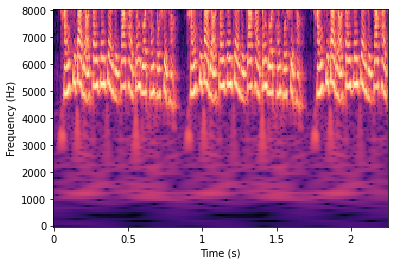

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

Sig = feature_extract_cqt(wav_fname, samp_sec=sec, sr = sr,
                          pre_emphasis = pre_emphasis,
                          filter_scale = filter_scale, n_bins = n_bins, fmin = fmin)[0]
print("cqt")

fig, ax = plt.subplots()
img = librosa.display.specshow(Sig, y_axis = "linear", sr = sr, hop_length =128, x_axis='time', 
                               ax=ax,  bins_per_octave=bins_per_octave,
                               auto_aspect=False
)


# fig.colorbar(img, ax=ax, format="%+2.f dB")



plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.title("No augmentation")
# plt.savefig(save_path + "DataAug_NoAug.png", dpi=300);
# plt.colorbar(format="%+2.0f dB");


## fake audio

### 치직거림

In [67]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00019954.wav'

wav = wave.open(wav_fname)
print("* [fake audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [fake audio]
* Sampling rate:  16000 Hz
* Total samples:  61000 samples
* Duration: 3.8125 sec
* Channels : 1 channels


cqt


Text(0, 0.5, 'Frequency (Hz)')

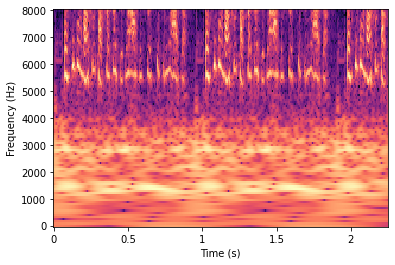

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

Sig = feature_extract_cqt(wav_fname, samp_sec=sec, sr = sr,
                          pre_emphasis = pre_emphasis,
                          filter_scale = filter_scale, n_bins = n_bins, fmin = fmin)[0]
print("cqt")

fig, ax = plt.subplots()
img = librosa.display.specshow(Sig, y_axis = "linear", sr = sr, hop_length =128, x_axis='time', 
                               ax=ax,  bins_per_octave=bins_per_octave,
                               auto_aspect=False
)


# fig.colorbar(img, ax=ax, format="%+2.f dB")



plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.title("No augmentation")
# plt.savefig(save_path + "DataAug_NoAug.png", dpi=300);
# plt.colorbar(format="%+2.0f dB");


### 치지직 + 작게 들림

In [75]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00015994.wav'

wav = wave.open(wav_fname)
print("* [fake audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [fake audio]
* Sampling rate:  16000 Hz
* Total samples:  49000 samples
* Duration: 3.0625 sec
* Channels : 1 channels


In [56]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00010049.wav'

wav = wave.open(wav_fname)
print("* [fake audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [fake audio]
* Sampling rate:  16000 Hz
* Total samples:  45000 samples
* Duration: 2.8125 sec
* Channels : 1 channels


cqt


Text(0, 0.5, 'Frequency (Hz)')

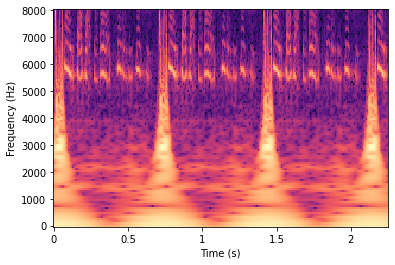

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

Sig = feature_extract_cqt(wav_fname, samp_sec=sec, sr = sr,
                          pre_emphasis = pre_emphasis,
                          filter_scale = filter_scale, n_bins = n_bins, fmin = fmin)[0]
print("cqt")

fig, ax = plt.subplots()
img = librosa.display.specshow(Sig, y_axis = "linear", sr = sr, hop_length =128, x_axis='time', 
                               ax=ax,  bins_per_octave=bins_per_octave,
                               auto_aspect=False
)


# fig.colorbar(img, ax=ax, format="%+2.f dB")



plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.title("No augmentation")
# plt.savefig(save_path + "DataAug_NoAug.png", dpi=300);
# plt.colorbar(format="%+2.0f dB");


### 음성 (기계소리)

In [76]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
wav_fname = add2022 + 'ADD_T_00018992.wav'

wav = wave.open(wav_fname)
print("* [fake audio]")
print("* Sampling rate: ", wav.getframerate(), "Hz")
print("* Total samples: ", wav.getnframes(), "samples")
print("* Duration:", wav.getnframes()/wav.getframerate(), "sec")
print("* Channels :", wav.getnchannels(), "channels")

ipd.Audio(wav_fname, rate=16000)

* [fake audio]
* Sampling rate:  16000 Hz
* Total samples:  45800 samples
* Duration: 2.8625 sec
* Channels : 1 channels


#### save a sample data 

In [77]:
import shutil

# 원본 WAV 파일 경로
add2022 = '/Data/data/ADD2022/ADD_train_dev/train/'
original_wav_fname = add2022 + 'ADD_T_00018992.wav'

# 새로운 저장 경로
save_path = '/Data/syh19/FFM_sy/sample_data/'
new_wav_fname = save_path + 'ADD_T_00018992.wav'

# 원본 WAV 파일을 새 경로로 복사
shutil.copy2(original_wav_fname, new_wav_fname)

print(f"WAV 파일을 새 경로에 저장 완료: {new_wav_fname}")


WAV 파일을 새 경로에 저장 완료: /Data/syh19/FFM_sy/sample_data/ADD_T_00018992.wav


cqt


Text(0, 0.5, 'Frequency (Hz)')

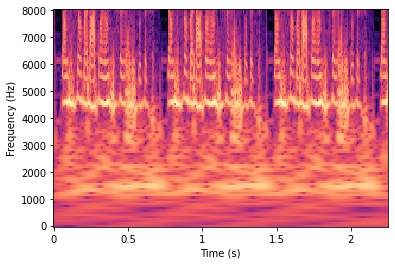

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

Sig = feature_extract_cqt(wav_fname, samp_sec=sec, sr = sr,
                          pre_emphasis = pre_emphasis,
                          filter_scale = filter_scale, n_bins = n_bins, fmin = fmin)[0]
print("cqt")

fig, ax = plt.subplots()
img = librosa.display.specshow(Sig, y_axis = "linear", sr = sr, hop_length =128, x_axis='time', 
                               ax=ax,  bins_per_octave=bins_per_octave,
                               auto_aspect=False
)


# fig.colorbar(img, ax=ax, format="%+2.f dB")



plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.title("No augmentation")
# plt.savefig(save_path + "DataAug_NoAug.png", dpi=300);
# plt.colorbar(format="%+2.0f dB");
